In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def load_dataframe(fname):
    try:
        dataframe =  pickle.load(open(fname, 'rb'))
    except:
        raise ValueError('NO DATAFILE FOUND')

    return dataframe

In [2]:
fname = "data/llama31_70B_meta_test.pkl" # ADD META PROMPTING FILE NAME
dfs = load_dataframe(fname = fname)

In [7]:
dfs['min']

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [8]:
q_list = ['min', 'max', 'actions', 'payoff', 'round', 'action_i', 'points_i', 'no_actions', 'no_points']

results = {k: {} for k in q_list}

for key in q_list:
    data = dfs[key]
    results[key]['mean'] = np.mean(data)
    results[key]['std'] = np.std(data)/np.sqrt(len(dfs.keys()))


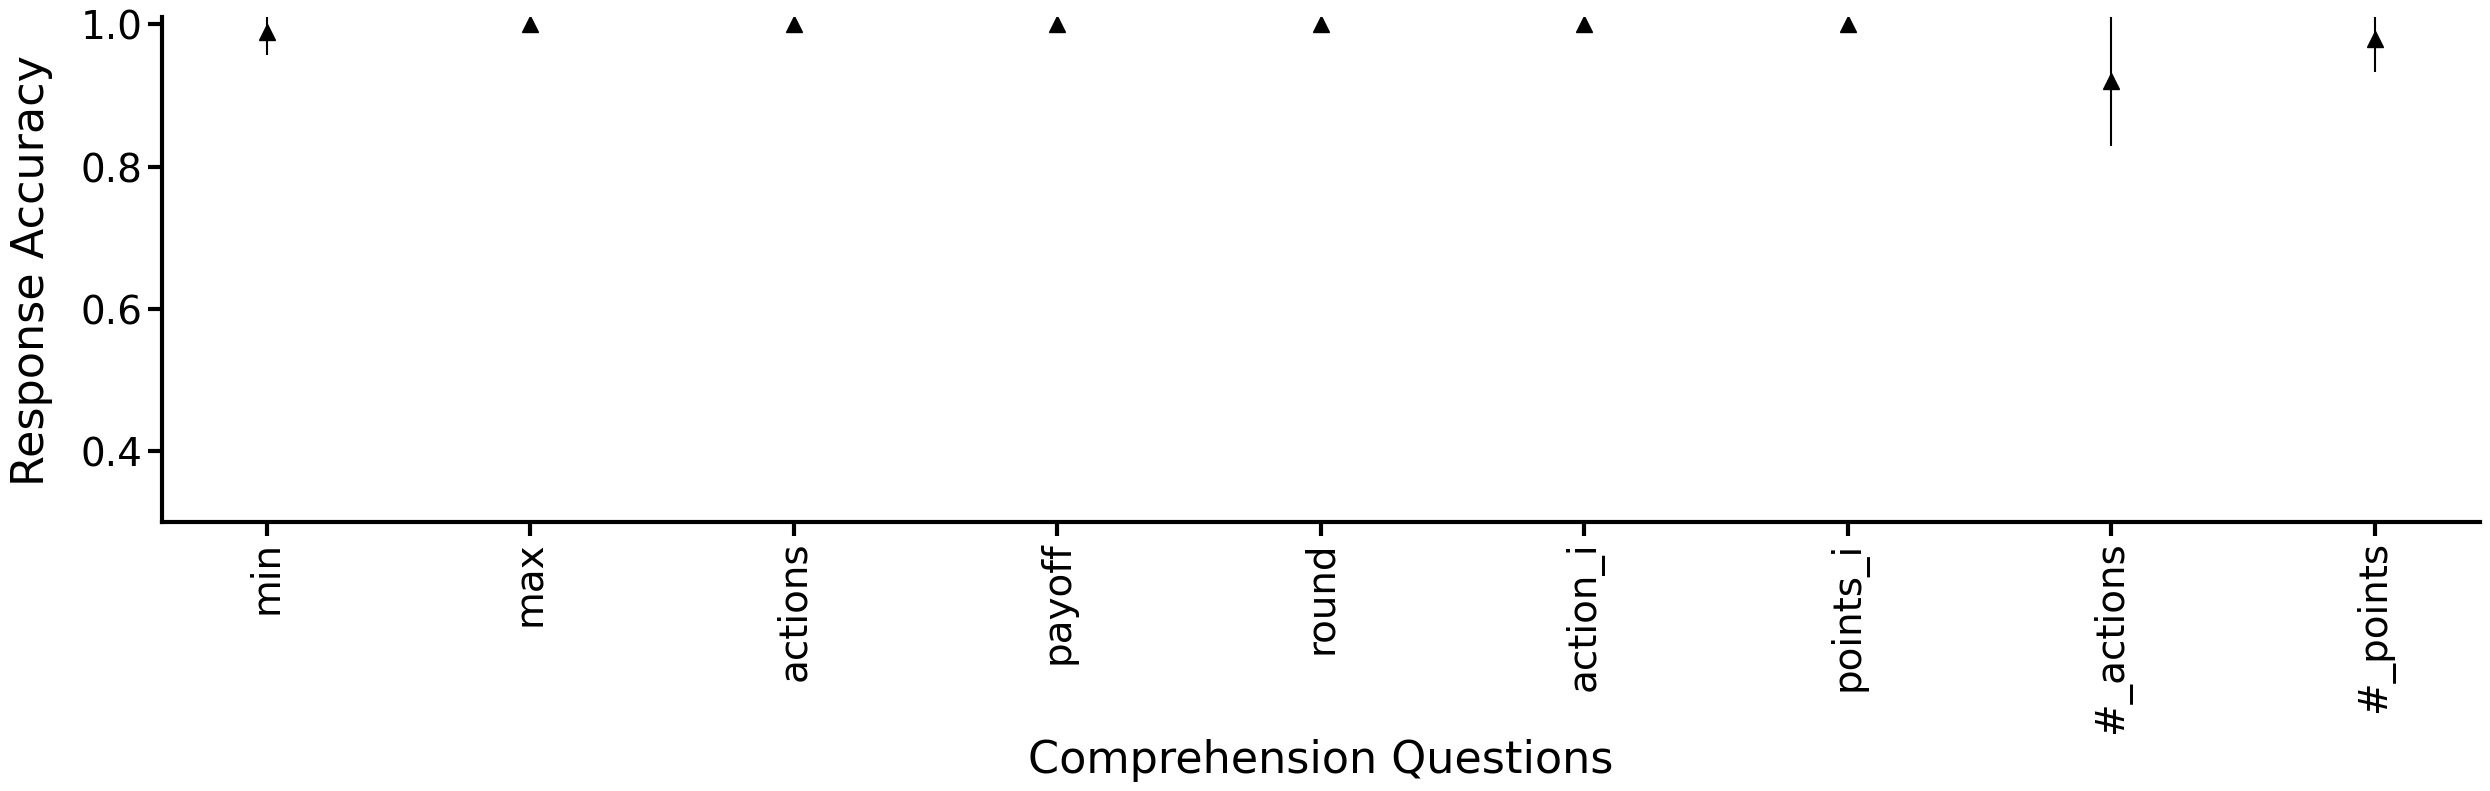

In [9]:
# analysis function
def meta_test(results):
    y = [results[key]['mean'] for key in q_list]
    yerr = [results[key]['std'] for key in q_list] 
    return y, yerr


# create figure 
labels = ['min', 'max', 'actions', 'payoff', 'round', 'action_i', 'points_i', '#_actions', '#_points']
fig, ax = plt.subplots(1, 1, figsize=(25, 8))
y, yerr  = meta_test(results)
# get analysed data and plot
ax.errorbar(range(len(y)), y=y,
                ls = '', marker = '^', color = 'k',ms = 12,
                yerr = yerr)
ax.set_xticks(range(len(results.keys())), labels, rotation = 90, fontsize = 28)
ax.tick_params(axis='both', which='major', labelsize=28)
ax.tick_params(axis='both', which='minor', labelsize=18, length=8) 
ax.tick_params(width=3, length=10)
ax.set_ylim(bottom = 0.3, top = 1.01)
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(3)
for axis in ['right','top']:
    ax.spines[axis].set_visible(False)

ax.set_xlabel('Comprehension Questions', y=0.0, fontsize=32)
ax.set_ylabel("Response Accuracy", fontsize = 32, labelpad = 20)

plt.tight_layout()
plt.show()
